In [53]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report
import pandas as pd
import json
import importlib
import math

try:
    from IPython import get_ipython
    if 'IPKernelApp' not in get_ipython().config:  # Not in a notebook
        from tqdm import tqdm
    else:  # In a notebook
        from tqdm.notebook import tqdm
except ImportError:  # IPython is not installed
    from tqdm import tqdm
# import utils
from utils import *

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


Using cuda device


In [54]:
# DATA LOADING
batch_size = 64

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

num_validation_samples = 5000
num_train_samples = len(train_data) - num_validation_samples
train_data, val_data = random_split(train_data, [num_train_samples, num_validation_samples])

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Files already downloaded and verified


In [ ]:
learning_rates = (0.2, 0.15, 0.05, 0.01, 0.005)
num_epochs = 30


for learning_rate in learning_rates:

    random_seed = 3
    torch.manual_seed(random_seed)

    model = BaselineNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimiser = optim.SGD(model.parameters(), lr=learning_rate)
            
    model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot = True)


In [ ]:
learning_rates = (0.01, 0.005, 0.0025)
num_epochs = 50

for learning_rate in learning_rates:

    random_seed = 3
    torch.manual_seed(random_seed)

    model = BaselineNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimiser = optim.SGD(model.parameters(), lr=learning_rate)
            
    model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot = True)

In [ ]:
learning_rates = (0.005, 0.0025)

num_epochs = 100

for learning_rate in learning_rates:

    random_seed = 3
    torch.manual_seed(random_seed)

    model = BaselineNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimiser = optim.SGD(model.parameters(), lr=learning_rate)
            
    model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot = True)


In [ ]:

initial_learning_rate = 0.15
num_epochs = 30

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.15, decay_rate=0.25):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [ ]:
initial_learning_rate = 0.15
num_epochs = 30

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.15, decay_rate=0.5):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [ ]:
initial_learning_rate = 0.1
num_epochs = 30

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.25):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [ ]:
initial_learning_rate = 0.1
num_epochs = 30

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.5):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [ ]:
initial_learning_rate = 0.1
num_epochs = 30

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.75):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [ ]:
initial_learning_rate = 0.1
num_epochs = 50

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.75):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [ ]:
initial_learning_rate = 0.15
num_epochs = 50

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.75):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [ ]:
initial_learning_rate = 0.15
num_epochs = 50

def adjust_initial_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.25):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser



random_seed = 3
torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,  plot = True, scheduler_func=adjust_initial_learning_rate)

In [26]:
class DropoutNet(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(in_features=128 * 4 * 4, out_features=128)
        self.dropout = nn.Dropout(p=dropout_rate)  # Dropout layer after the first FC layer
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = F.relu(self.conv2(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = F.relu(self.conv3(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))  # 1st fully connected layer + ReLU
        x = self.dropout(x)  # Applying dropout after activation
        x = self.fc2(x)  # 3rd fully connected layer (output)
        return x
    
class DropoutNet_2(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(in_features=128 * 4 * 4, out_features=128)
        self.dropout = nn.Dropout(p=dropout_rate)  # Dropout layer after the first FC layer
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = F.relu(self.conv2(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = F.relu(self.conv3(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = self.dropout(x)  # Applying dropout after activation
        x = F.relu(self.fc1(x))  # 1st fully connected layer + ReLU
        x = self.dropout(x)  # Applying dropout after activation
        x = self.fc2(x)  # 3rd fully connected layer (output)
        
        return x

class DropoutNet_3(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(in_features=128 * 4 * 4, out_features=128)
        self.dropout = nn.Dropout(p=dropout_rate)  # Dropout layer after the first FC layer
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = F.relu(self.conv2(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = F.relu(self.conv3(x))
        x = self.pool(x) # 1st convolutional layer + ReLU + pooling
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))  # 1st fully connected layer + ReLU
        x = self.dropout(x)  # Applying dropout after activation
        x = self.fc2(x)  # 3rd fully connected layer (output)
        x = self.dropout(x)  # Applying dropout after activation
        
        return x

LR: 0.0025
Epoch [1/30] - Train Loss: 2.3018, Acc: 0.1021 | Val Loss: 2.3002, Acc: 0.0936
LR: 0.0014285714285714286
Epoch [2/30] - Train Loss: 2.2983, Acc: 0.1147 | Val Loss: 2.2973, Acc: 0.0991
LR: 0.001
Epoch [3/30] - Train Loss: 2.2958, Acc: 0.1283 | Val Loss: 2.2952, Acc: 0.1339
LR: 0.0007692307692307692
Epoch [4/30] - Train Loss: 2.2935, Acc: 0.1369 | Val Loss: 2.2929, Acc: 0.1535
LR: 0.000625
Epoch [5/30] - Train Loss: 2.2914, Acc: 0.1413 | Val Loss: 2.2908, Acc: 0.1501
LR: 0.0005263157894736842
Epoch [6/30] - Train Loss: 2.2893, Acc: 0.1424 | Val Loss: 2.2883, Acc: 0.1483
LR: 0.00045454545454545455
Epoch [7/30] - Train Loss: 2.2867, Acc: 0.1471 | Val Loss: 2.2863, Acc: 0.1430
LR: 0.0004
Epoch [8/30] - Train Loss: 2.2849, Acc: 0.1488 | Val Loss: 2.2841, Acc: 0.1519
LR: 0.00035714285714285714
Epoch [9/30] - Train Loss: 2.2825, Acc: 0.1535 | Val Loss: 2.2817, Acc: 0.1539
LR: 0.0003225806451612903
Epoch [10/30] - Train Loss: 2.2803, Acc: 0.1500 | Val Loss: 2.2796, Acc: 0.1570
LR: 0.

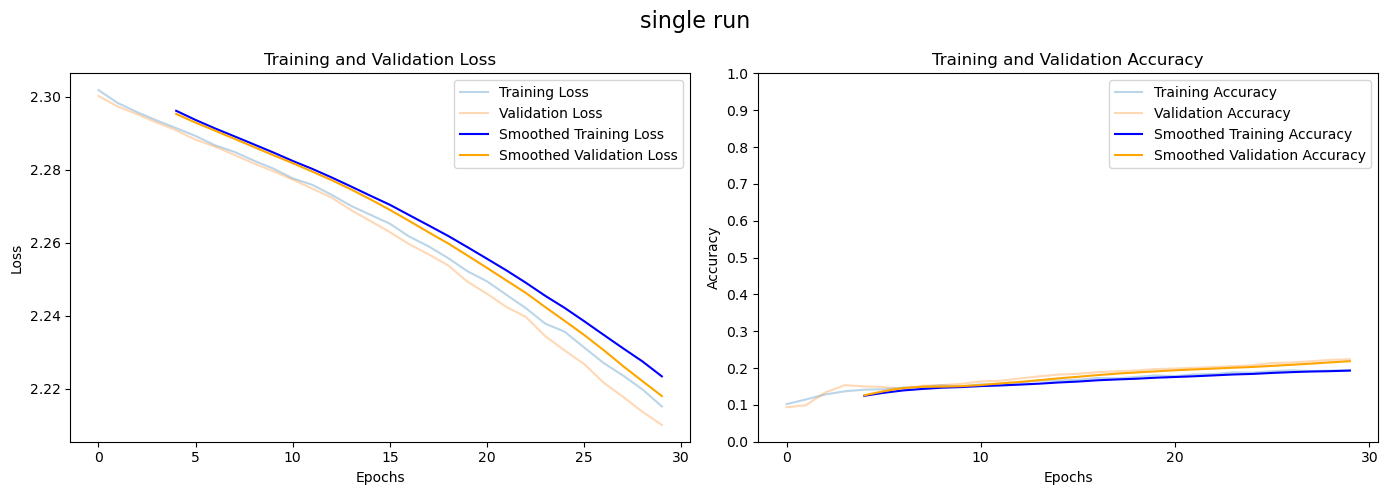

In [28]:
def adjust_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.75):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser

num_epochs = 30

dropout_rate = 0.6
torch.manual_seed(random_seed)

model = DropoutNet(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,scheduler_func=adjust_learning_rate, plot = True)


LR: 0.0025
Epoch [1/30] - Train Loss: 2.3016, Acc: 0.1006 | Val Loss: 2.3001, Acc: 0.0936
LR: 0.0014285714285714286
Epoch [2/30] - Train Loss: 2.2981, Acc: 0.1037 | Val Loss: 2.2971, Acc: 0.1050
LR: 0.001
Epoch [3/30] - Train Loss: 2.2953, Acc: 0.1306 | Val Loss: 2.2949, Acc: 0.1436
LR: 0.0007692307692307692
Epoch [4/30] - Train Loss: 2.2927, Acc: 0.1566 | Val Loss: 2.2925, Acc: 0.1483
LR: 0.000625
Epoch [5/30] - Train Loss: 2.2902, Acc: 0.1550 | Val Loss: 2.2902, Acc: 0.1392
LR: 0.0005263157894736842
Epoch [6/30] - Train Loss: 2.2876, Acc: 0.1422 | Val Loss: 2.2872, Acc: 0.1315
LR: 0.00045454545454545455
Epoch [7/30] - Train Loss: 2.2849, Acc: 0.1362 | Val Loss: 2.2851, Acc: 0.1278
LR: 0.0004
Epoch [8/30] - Train Loss: 2.2822, Acc: 0.1345 | Val Loss: 2.2825, Acc: 0.1266
LR: 0.00035714285714285714
Epoch [9/30] - Train Loss: 2.2794, Acc: 0.1357 | Val Loss: 2.2797, Acc: 0.1325
LR: 0.0003225806451612903
Epoch [10/30] - Train Loss: 2.2765, Acc: 0.1402 | Val Loss: 2.2772, Acc: 0.1335
LR: 0.

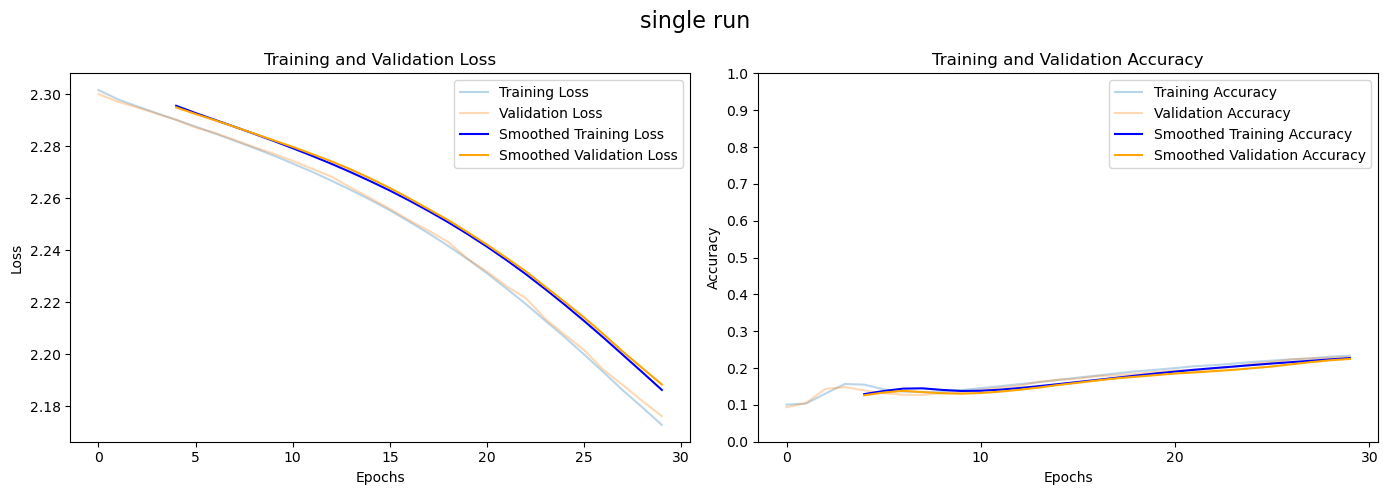

In [34]:
def adjust_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.75):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser

num_epochs = 30

dropout_rate = 0
torch.manual_seed(random_seed)

model = DropoutNet(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,scheduler_func=adjust_learning_rate, plot = True)

LR: 0.0025
Epoch [1/60] - Train Loss: 2.3018, Acc: 0.1020 | Val Loss: 2.3002, Acc: 0.0936
LR: 0.002
Epoch [2/60] - Train Loss: 2.2977, Acc: 0.1181 | Val Loss: 2.2961, Acc: 0.1129
LR: 0.0016666666666666668
Epoch [3/60] - Train Loss: 2.2933, Acc: 0.1372 | Val Loss: 2.2914, Acc: 0.1503
LR: 0.0014285714285714286
Epoch [4/60] - Train Loss: 2.2877, Acc: 0.1452 | Val Loss: 2.2847, Acc: 0.1470
LR: 0.00125
Epoch [5/60] - Train Loss: 2.2801, Acc: 0.1553 | Val Loss: 2.2754, Acc: 0.1610
LR: 0.0011111111111111111
Epoch [6/60] - Train Loss: 2.2695, Acc: 0.1625 | Val Loss: 2.2610, Acc: 0.1897
LR: 0.001
Epoch [7/60] - Train Loss: 2.2523, Acc: 0.1777 | Val Loss: 2.2403, Acc: 0.2029
LR: 0.0009090909090909091
Epoch [8/60] - Train Loss: 2.2295, Acc: 0.1931 | Val Loss: 2.2088, Acc: 0.2328
LR: 0.0008333333333333334
Epoch [9/60] - Train Loss: 2.1999, Acc: 0.1999 | Val Loss: 2.1741, Acc: 0.2496
LR: 0.0007692307692307692
Epoch [10/60] - Train Loss: 2.1689, Acc: 0.2098 | Val Loss: 2.1411, Acc: 0.2609
LR: 0.0007

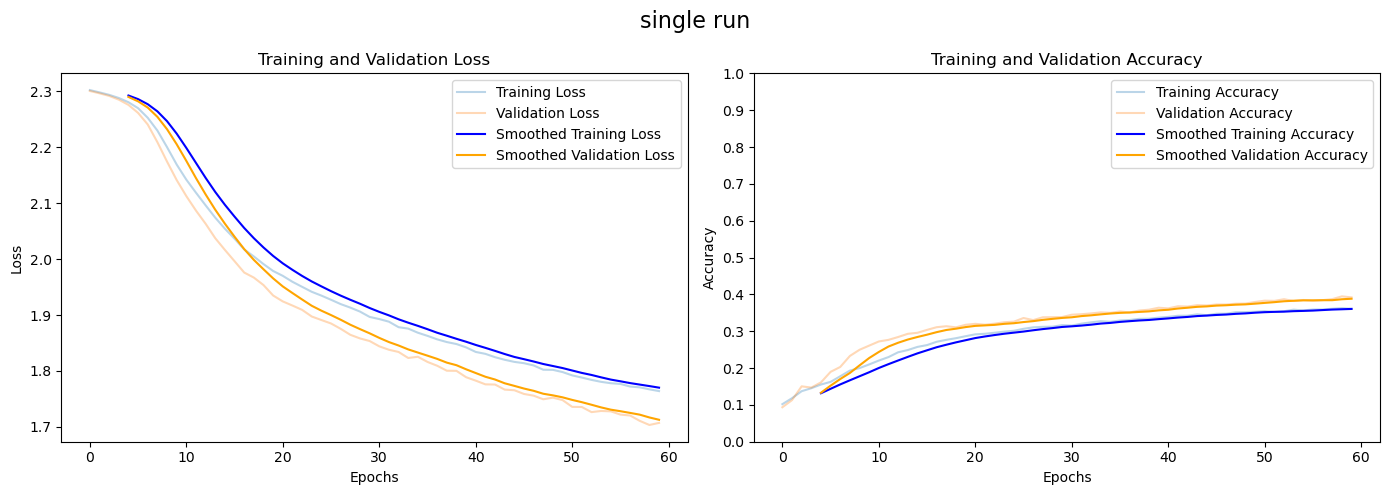

In [35]:
def adjust_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.25):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser

num_epochs = 60

dropout_rate = 0.6
torch.manual_seed(random_seed)

model = DropoutNet(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,scheduler_func=adjust_learning_rate, plot = True)

Epoch [1/60] - Train Loss: 2.2918, Acc: 0.1317 | Val Loss: 2.2631, Acc: 0.1962
Epoch [2/60] - Train Loss: 2.1143, Acc: 0.2298 | Val Loss: 1.9423, Acc: 0.3026
Epoch [3/60] - Train Loss: 1.8924, Acc: 0.3145 | Val Loss: 1.7659, Acc: 0.3754
Epoch [4/60] - Train Loss: 1.7457, Acc: 0.3655 | Val Loss: 1.6639, Acc: 0.3829
Epoch [5/60] - Train Loss: 1.6491, Acc: 0.3983 | Val Loss: 1.7675, Acc: 0.3782
Epoch [6/60] - Train Loss: 1.5817, Acc: 0.4260 | Val Loss: 1.5407, Acc: 0.4444
Epoch [7/60] - Train Loss: 1.5221, Acc: 0.4480 | Val Loss: 1.7071, Acc: 0.4023
Epoch [8/60] - Train Loss: 1.4730, Acc: 0.4631 | Val Loss: 1.6982, Acc: 0.4130
Epoch [9/60] - Train Loss: 1.4295, Acc: 0.4793 | Val Loss: 1.4363, Acc: 0.4747
Epoch [10/60] - Train Loss: 1.3924, Acc: 0.4984 | Val Loss: 1.4638, Acc: 0.4816
Epoch [11/60] - Train Loss: 1.3510, Acc: 0.5131 | Val Loss: 1.2974, Acc: 0.5249
Epoch [12/60] - Train Loss: 1.3171, Acc: 0.5256 | Val Loss: 1.4605, Acc: 0.4814
Epoch [13/60] - Train Loss: 1.2801, Acc: 0.5394 |

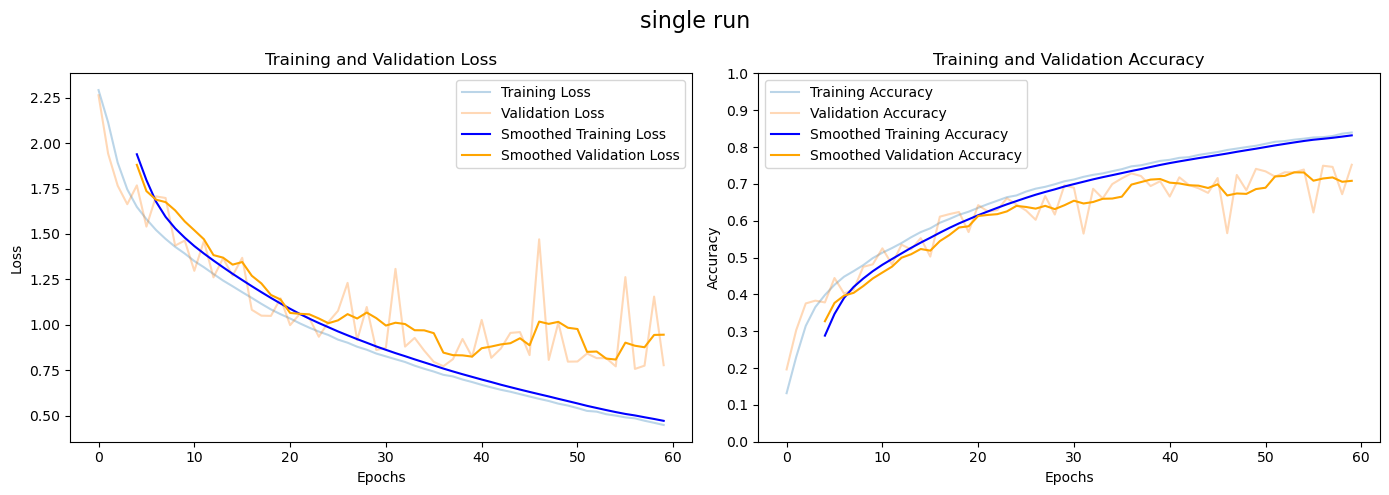

In [47]:
num_epochs = 60
learning_rate = 0.01
dropout_rate = 0.6
torch.manual_seed(random_seed)

model = DropoutNet(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot = True)

Epoch [1/60] - Train Loss: 2.2996, Acc: 0.1101 | Val Loss: 2.2952, Acc: 0.1137
Epoch [2/60] - Train Loss: 2.2822, Acc: 0.1501 | Val Loss: 2.2600, Acc: 0.1917
Epoch [3/60] - Train Loss: 2.1895, Acc: 0.2014 | Val Loss: 2.0830, Acc: 0.2658
Epoch [4/60] - Train Loss: 2.0272, Acc: 0.2650 | Val Loss: 1.9231, Acc: 0.3256
Epoch [5/60] - Train Loss: 1.9181, Acc: 0.3073 | Val Loss: 1.9080, Acc: 0.3184
Epoch [6/60] - Train Loss: 1.8253, Acc: 0.3382 | Val Loss: 1.7559, Acc: 0.3689
Epoch [7/60] - Train Loss: 1.7450, Acc: 0.3627 | Val Loss: 1.7129, Acc: 0.3792
Epoch [8/60] - Train Loss: 1.6847, Acc: 0.3847 | Val Loss: 1.8555, Acc: 0.3471
Epoch [9/60] - Train Loss: 1.6395, Acc: 0.3994 | Val Loss: 1.5782, Acc: 0.4171
Epoch [10/60] - Train Loss: 1.6024, Acc: 0.4131 | Val Loss: 1.6293, Acc: 0.4130
Epoch [11/60] - Train Loss: 1.5686, Acc: 0.4271 | Val Loss: 1.4889, Acc: 0.4527
Epoch [12/60] - Train Loss: 1.5403, Acc: 0.4384 | Val Loss: 1.7099, Acc: 0.4019
Epoch [13/60] - Train Loss: 1.5085, Acc: 0.4525 |

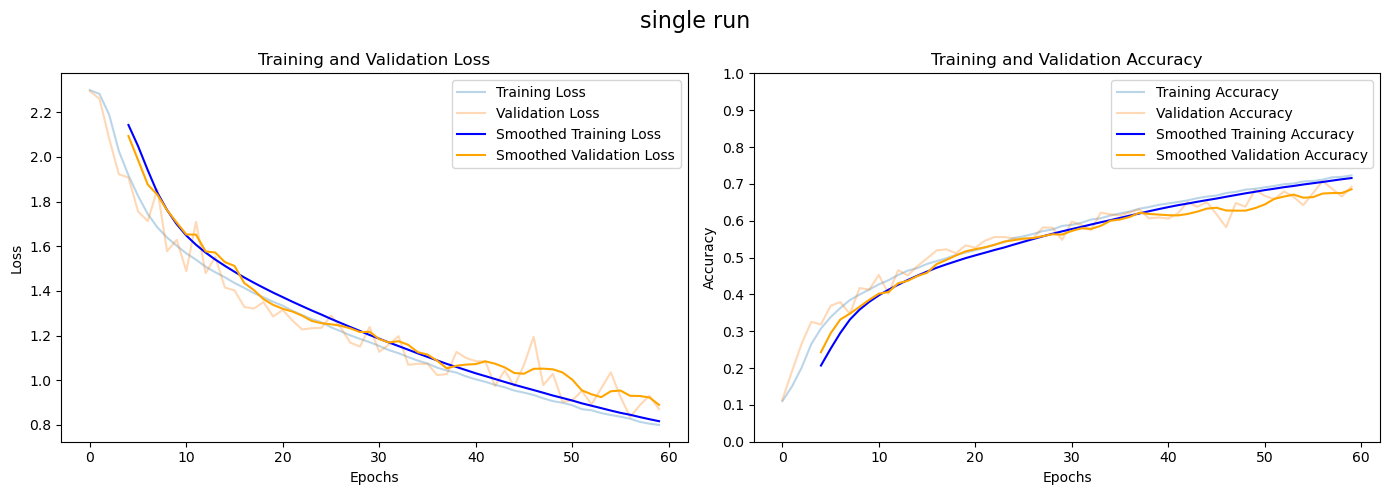

In [48]:
num_epochs = 60
learning_rate = 0.005
dropout_rate = 0.6
torch.manual_seed(random_seed)

model = DropoutNet(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot = True)

Epoch [1/25] - Train Loss: 1.9241, Acc: 0.2844 | Val Loss: 1.5568, Acc: 0.4284
Epoch [2/25] - Train Loss: 1.5275, Acc: 0.4371 | Val Loss: 1.3517, Acc: 0.4966
Epoch [3/25] - Train Loss: 1.3557, Acc: 0.5068 | Val Loss: 1.4875, Acc: 0.4786
Epoch [4/25] - Train Loss: 1.2318, Acc: 0.5598 | Val Loss: 1.1675, Acc: 0.5761
Epoch [5/25] - Train Loss: 1.1410, Acc: 0.5958 | Val Loss: 2.2275, Acc: 0.4057
Epoch [6/25] - Train Loss: 1.0879, Acc: 0.6168 | Val Loss: 1.6121, Acc: 0.4246
Epoch [7/25] - Train Loss: 1.0241, Acc: 0.6405 | Val Loss: 1.3638, Acc: 0.5591
Epoch [8/25] - Train Loss: 0.9924, Acc: 0.6520 | Val Loss: 0.9976, Acc: 0.6442
Epoch [9/25] - Train Loss: 0.9550, Acc: 0.6687 | Val Loss: 1.3086, Acc: 0.5538
Epoch [10/25] - Train Loss: 0.9273, Acc: 0.6757 | Val Loss: 0.7905, Acc: 0.7277
Epoch [11/25] - Train Loss: 0.9045, Acc: 0.6843 | Val Loss: 0.8826, Acc: 0.6980
Epoch [12/25] - Train Loss: 0.8825, Acc: 0.6923 | Val Loss: 0.9163, Acc: 0.6748
Epoch [13/25] - Train Loss: 0.8632, Acc: 0.6992 |

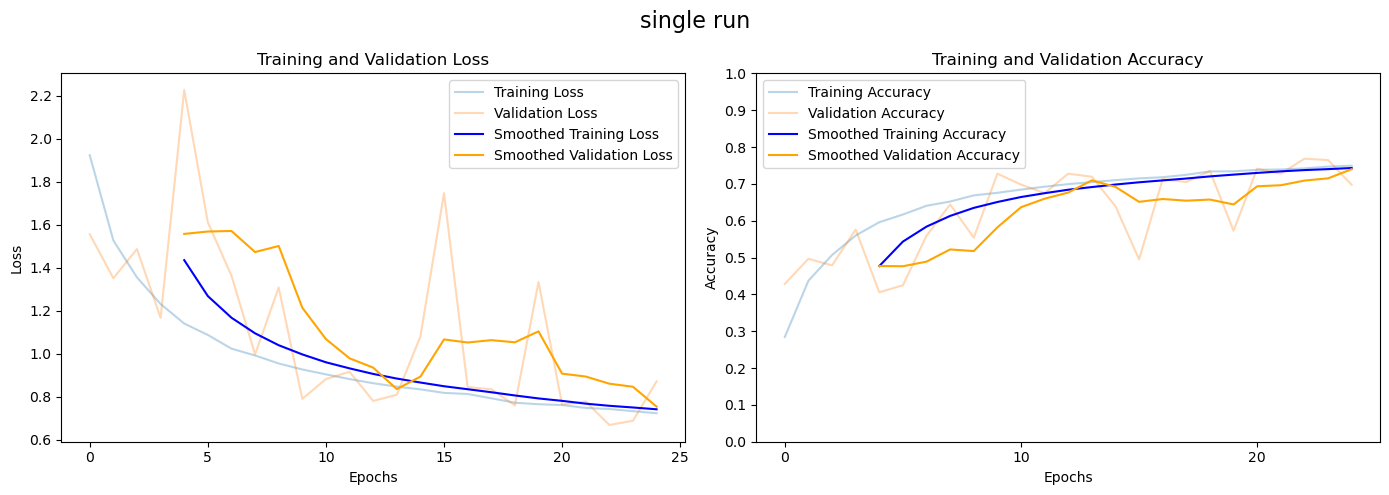

In [44]:

num_epochs = 25

learning_rate = 0.1

dropout_rate = 0.6
torch.manual_seed(random_seed)

model = DropoutNet_2(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False, plot = True)


In [39]:
def adjust_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.1):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser

num_epochs = 60

dropout_rate = 0.6
torch.manual_seed(random_seed)

model = DropoutNet(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,scheduler_func=adjust_learning_rate, plot = True)

LR: 0.0025
Epoch [1/60] - Train Loss: 2.3018, Acc: 0.1020 | Val Loss: 2.3002, Acc: 0.0936
LR: 0.0022727272727272726
Epoch [2/60] - Train Loss: 2.2974, Acc: 0.1197 | Val Loss: 2.2954, Acc: 0.1234
LR: 0.0020833333333333333
Epoch [3/60] - Train Loss: 2.2917, Acc: 0.1408 | Val Loss: 2.2886, Acc: 0.1444
LR: 0.001923076923076923
Epoch [4/60] - Train Loss: 2.2824, Acc: 0.1501 | Val Loss: 2.2759, Acc: 0.1630
LR: 0.0017857142857142859


KeyboardInterrupt: 

In [ ]:
def adjust_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.05):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser

num_epochs = 60

dropout_rate = 0.6
torch.manual_seed(random_seed)

model = DropoutNet(dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,scheduler_func=adjust_learning_rate, plot = True)

In [ ]:
def adjust_learning_rate(optimiser, epoch, initial_lr=0.1, decay_rate=0.75):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:',new_lr)
    return optimiser

num_epochs = 30

torch.manual_seed(random_seed)

model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True,scheduler_func=adjust_learning_rate, plot = True)

In [40]:
print(learning_rate)

0.0025


In [52]:
from torchsummary import summary
class BaselineNet(nn.Module):
    def __init__(self, a):
        super().__init__()
        self.a = a
        self.b= self.a*2
        self.c= self.b*2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=self.a, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=self.a, out_channels=self.b, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=self.b, out_channels=self.c, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=self.c * 4 * 4, out_features=self.c)
        self.fc2 = nn.Linear(in_features=self.c, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = BaselineNet(16).to(device)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
         MaxPool2d-2           [-1, 32, 16, 16]               0
            Conv2d-3           [-1, 64, 16, 16]          18,496
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5            [-1, 128, 8, 8]          73,856
         MaxPool2d-6            [-1, 128, 4, 4]               0
            Linear-7                  [-1, 128]         262,272
            Linear-8                   [-1, 10]           1,290
Total params: 356,810
Trainable params: 356,810
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.55
Params size (MB): 1.36
Estimated Total Size (MB): 1.92
----------------------------------------------------------------


Epoch [1/50] - Train Loss: 2.0211, Acc: 0.2554 | Val Loss: 1.8259, Acc: 0.3279
Epoch [2/50] - Train Loss: 1.6123, Acc: 0.4121 | Val Loss: 1.6131, Acc: 0.4086
Epoch [3/50] - Train Loss: 1.4153, Acc: 0.4854 | Val Loss: 2.0359, Acc: 0.3554
Epoch [4/50] - Train Loss: 1.2622, Acc: 0.5462 | Val Loss: 1.4137, Acc: 0.4903
Epoch [5/50] - Train Loss: 1.1499, Acc: 0.5931 | Val Loss: 1.6116, Acc: 0.4589
Epoch [6/50] - Train Loss: 1.0648, Acc: 0.6239 | Val Loss: 1.1474, Acc: 0.5888
Epoch [7/50] - Train Loss: 1.0031, Acc: 0.6451 | Val Loss: 1.1390, Acc: 0.5975
Epoch [8/50] - Train Loss: 0.9569, Acc: 0.6652 | Val Loss: 1.4893, Acc: 0.5069
Epoch [9/50] - Train Loss: 0.9185, Acc: 0.6779 | Val Loss: 1.4102, Acc: 0.5532
Epoch [10/50] - Train Loss: 0.8843, Acc: 0.6880 | Val Loss: 1.1332, Acc: 0.6013
Epoch [11/50] - Train Loss: 0.8576, Acc: 0.6981 | Val Loss: 1.1873, Acc: 0.5922
Epoch [12/50] - Train Loss: 0.8270, Acc: 0.7084 | Val Loss: 1.1077, Acc: 0.6125
Epoch [13/50] - Train Loss: 0.8052, Acc: 0.7158 |

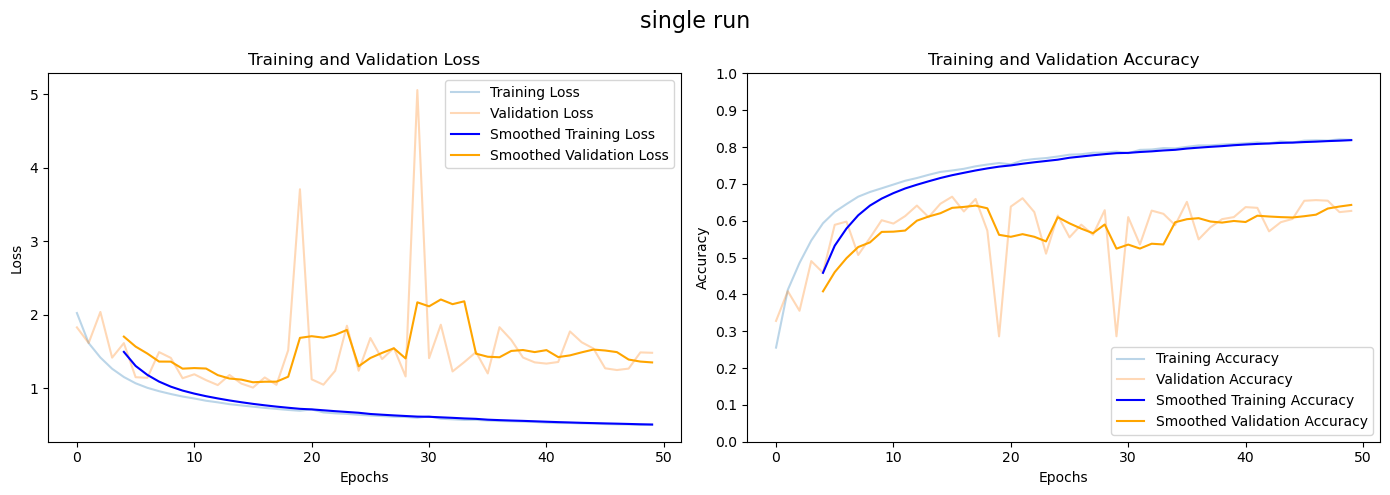

In [59]:
class BaselineNet(nn.Module):
    def __init__(self, a):
        super().__init__()
        self.a = a
        self.b= self.a*2
        self.c= self.b*2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=self.a, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=self.a, out_channels=self.b, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=self.b, out_channels=self.c, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=self.c * 4 * 4, out_features=self.c)
        self.fc2 = nn.Linear(in_features=self.c, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
initial_learning_rate= 0.05
num_epochs = 50

torch.manual_seed(0)
model = BaselineNet(8).to(device)

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False,  plot = True)

Epoch [1/25] - Train Loss: 1.8189, Acc: 0.3339 | Val Loss: 1.8037, Acc: 0.3695
Epoch [2/25] - Train Loss: 1.3419, Acc: 0.5158 | Val Loss: 1.9577, Acc: 0.3347
Epoch [3/25] - Train Loss: 1.1119, Acc: 0.6079 | Val Loss: 1.1630, Acc: 0.5953
Epoch [4/25] - Train Loss: 0.9523, Acc: 0.6650 | Val Loss: 1.4426, Acc: 0.5311
Epoch [5/25] - Train Loss: 0.8486, Acc: 0.7026 | Val Loss: 1.5765, Acc: 0.5225
Epoch [6/25] - Train Loss: 0.7642, Acc: 0.7325 | Val Loss: 1.1445, Acc: 0.6187
Epoch [7/25] - Train Loss: 0.6942, Acc: 0.7557 | Val Loss: 1.1555, Acc: 0.6218
Epoch [8/25] - Train Loss: 0.6269, Acc: 0.7808 | Val Loss: 0.9782, Acc: 0.6831
Epoch [9/25] - Train Loss: 0.5790, Acc: 0.7961 | Val Loss: 1.0292, Acc: 0.6806
Epoch [10/25] - Train Loss: 0.5281, Acc: 0.8138 | Val Loss: 1.0497, Acc: 0.6782
Epoch [11/25] - Train Loss: 0.4881, Acc: 0.8278 | Val Loss: 1.4157, Acc: 0.6189
Epoch [12/25] - Train Loss: 0.4472, Acc: 0.8411 | Val Loss: 1.9266, Acc: 0.5554
Epoch [13/25] - Train Loss: 0.4156, Acc: 0.8512 |

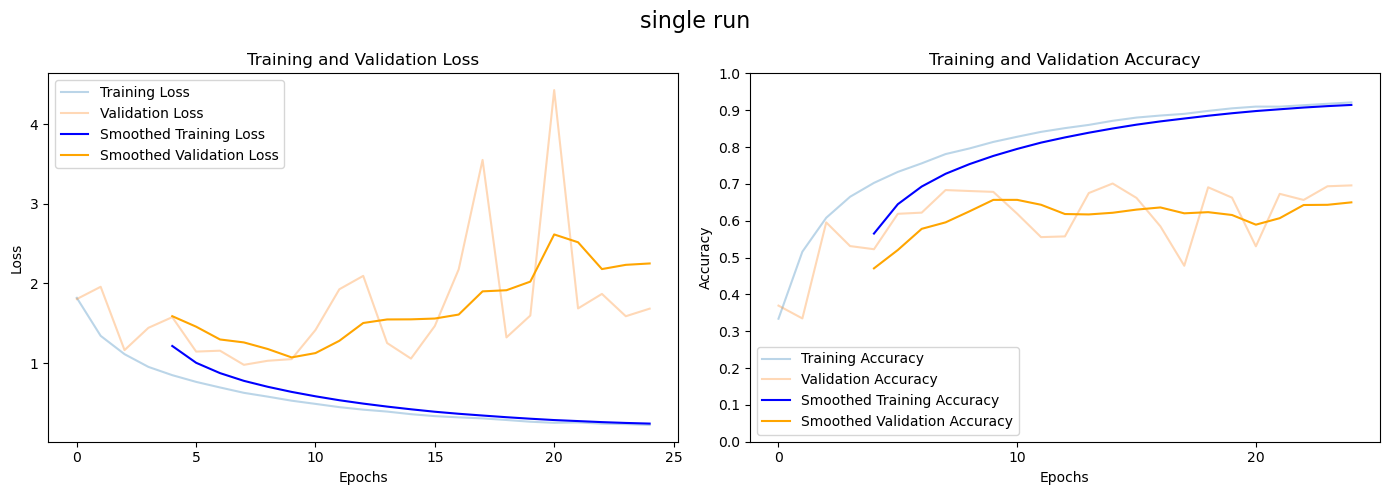

In [60]:
class BaselineNet(nn.Module):
    def __init__(self, a):
        super().__init__()
        self.a = a
        self.b= self.a*2
        self.c= self.b*2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=self.a, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=self.a, out_channels=self.b, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=self.b, out_channels=self.c, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=self.c * 4 * 4, out_features=self.c)
        self.fc2 = nn.Linear(in_features=self.c, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
initial_learning_rate= 0.1
num_epochs = 25

torch.manual_seed(0)
model = BaselineNet(16).to(device)

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=initial_learning_rate)
        
model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, initial_learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=False,  plot = True)